__Author__: Bogdan Bintu

__Email__: bbintu@g.harvard.edu

__Date__:3/4/2020

In [16]:
import cPickle as pickle
import numpy as np
import os
import matplotlib.pylab as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['font.size']=15
matplotlib.rcParams['font.family']='Arial'

### Load data

In [2]:
folder = r'C:\Users\Bogdan\Dropbox\2020 Chromatin Imaging Manuscript\Revision\DataForReviewers'
fid = open(folder+os.sep+r'genomic-scale-with transcription and nuclear bodies.tsv','r')
lines = np.array([ln[:-1].split('\t')for ln in fid if len(ln)>0])
zxy = np.array(lines[1:,:3][:],dtype=np.float)
zxy = zxy.reshape([-1,2082,3])/1000 #transform to um

In [3]:
Transcr = []#np.array(['on' in e for e in lines[1:,8]])
for e in lines[1:,8]:
    if 'on' in e:
        Transcr.append(1)
    elif (e=='') or (e=='nan'):
        Transcr.append(np.nan)
    else:
        Transcr.append(0)
Transcr_WT = np.array(Transcr).reshape([-1,1041])

In [4]:
#Please see Part 3 how to calculate densities
#resWT = np.load(r'Data\densityIMR90Untreated.npy')
resWT = np.load(r'C:\Users\Bogdan\Dropbox\Chromosome21_online\densityIMR90Untreated.npy')
keep = slice(None)
AD = resWT[keep,0,0,:]
BD = resWT[keep,1,0,:]
Dratio_WT = AD/BD
Dratio_WT = Dratio_WT.reshape([-1,1041])[-len(Transcr_WT):]
good_WT = (~np.isnan(zxy[:,:,0])).reshape([-1,1041])

C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in divide
  import sys


In [38]:
tot_distsNUC_WT_ = np.array(lines[1:,-2],dtype=np.float).reshape([-1,1041])/1000
tot_distsSC_WT_ = np.array(lines[1:,-1],dtype=np.float).reshape([-1,1041])/1000
tot_distsLAM_WT_ = np.array(lines[1:,-3],dtype=np.float).reshape([-1,1041])/1000

In [12]:
save_folder = r'C:\Users\Bogdan\Dropbox\Chromosome21_online\Figures_replace_genome_wide'

### Nucleoli association

C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


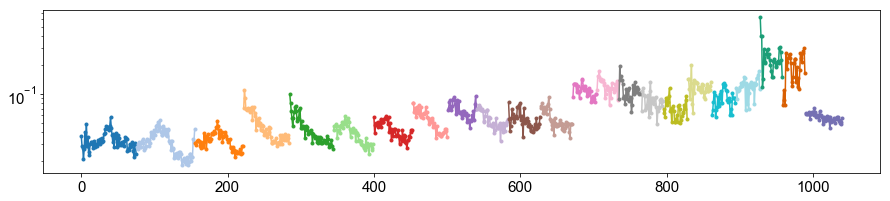

In [17]:
#distances are assumed in um
tot_dists = tot_distsNUC_WT_
asocs = 1.*np.sum(tot_dists<0.25,0)/np.sum(tot_dists>-1,0)
lens = [76, 80, 66, 63, 60, 55, 53, 48, 40, 43, 44, 44, 33, 30, 31, 30, 33, 33, 33, 33, 31, 31, 51]
edges = np.cumsum([0]+lens)
from matplotlib import cm
fig = plt.figure(figsize=(15,3))
colors = list(cm.tab20.colors)+list(cm.Dark2.colors)
for i in range(len(edges)-1):
    plt.semilogy(np.arange(edges[i],edges[i+1]),asocs[edges[i]:edges[i+1]],'.-',color = colors[i])
fig.savefig(save_folder+os.sep+'nucleoli_association.pdf')

### Lamina and speckle

In [75]:
nuc_cutoff = 0.25
frLAM_WT = 1.*np.sum(tot_distsLAM_WT_<nuc_cutoff,0)/np.sum(good_WT,0)
frNUC_WT = 1.*np.sum(tot_distsNUC_WT_<nuc_cutoff,0)/np.sum(good_WT,0)
frSC_WT = 1.*np.sum(tot_distsSC_WT_<nuc_cutoff,0)/np.sum(good_WT,0)

dLAM_WT = np.nanmedian(tot_distsLAM_WT_,axis=0)
dSC_WT = np.nanmedian(tot_distsSC_WT_,axis=0)
dNUC_WT = np.nanmedian(tot_distsNUC_WT_,axis=0)
dRAT_WT = np.nanmedian(Dratio_WT,axis=0)

C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


### Speckle association and A/B density

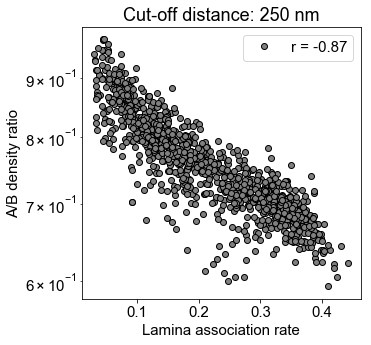

In [76]:
fig=plt.figure(figsize=(5,5))
cor = np.round(np.corrcoef(np.log(frLAM_WT),np.log(dRAT_WT))[0,1],2)
plt.semilogy(frLAM_WT,dRAT_WT,'o',color='gray',markeredgecolor='k',label='r = '+str(cor))
plt.ylabel("A/B density ratio")
plt.xlabel("Lamina association rate")
plt.title('Cut-off distance: '+str(int(nuc_cutoff*1000))+' nm')
plt.legend()
fig.savefig(save_folder+os.sep+'fr_lamina_ABdensity'+str(int(nuc_cutoff*1000))+'.pdf')

### Lamina association and A/B density

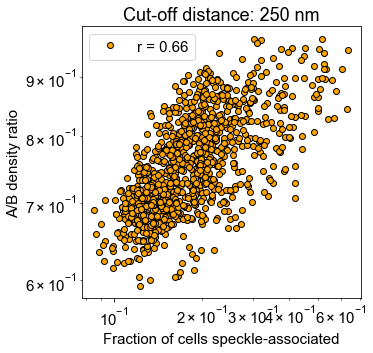

In [77]:
fig=plt.figure(figsize=(5,5))
cor = np.round(np.corrcoef(np.log(frSC_WT),np.log(dRAT_WT))[0,1],2)
plt.loglog(frSC_WT,dRAT_WT,'o',color='orange',markeredgecolor='k',label='r = '+str(cor))
plt.ylabel("A/B density ratio")
plt.xlabel("Fraction of cells speckle-associated")
plt.title('Cut-off distance: '+str(int(nuc_cutoff*1000))+' nm')
plt.legend()
fig.savefig(save_folder+os.sep+'fr_speckle_ABdensity'+str(int(nuc_cutoff*1000))+'.pdf')

### Transcriptional dependent association

C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in divide
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater


13.2049518569
90.6464924347


C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in divide
C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater


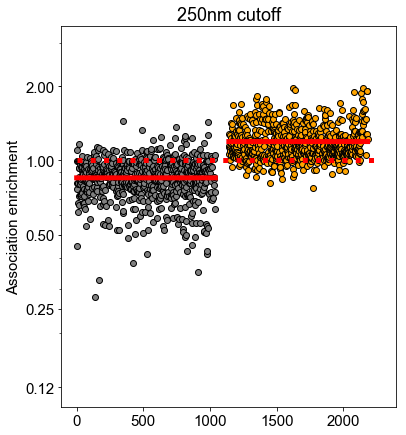

In [74]:
nuc_cutoof = 0.5
Asocs_LAM_WT = tot_distsLAM_WT_<nuc_cutoof
Asocs_NUC_WT = tot_distsNUC_WT_<nuc_cutoof
Asocs_SC_WT = tot_distsSC_WT_<nuc_cutoof
dif = (1041+100)
good_WT = tot_distsLAM_WT_>-1
fig=plt.figure(figsize=(6,7))
Asocs = Asocs_LAM_WT##########################################
Transcr_WT = Transcr_WT==1
aSs = 1.*np.sum(Asocs*(~Transcr_WT),axis=0)/np.sum((~Transcr_WT)*good_WT,axis=0)
aTs = 1.*np.sum(Asocs*(Transcr_WT),axis=0)/np.sum(Transcr_WT*good_WT,axis=0)
anNs = 1.*np.sum(Transcr_WT*(~Asocs),axis=0)/np.sum((~Asocs)*good_WT,axis=0)
aNs = 1.*np.sum(Transcr_WT*(Asocs),axis=0)/np.sum(Asocs*good_WT,axis=0)
plt.semilogy(np.arange(len(aTs))+dif*0,aTs/aSs,'o',color='gray',markeredgecolor='k')
plt.plot(np.arange(len(aTs))+dif*0,[np.nanmean(aTs/aSs)]*len(aTs),lw=5,color='r')

fr = aTs/aSs
fr = 100.*np.sum(fr>1)/np.sum(fr>-1)
print(fr)



Asocs = Asocs_SC_WT##########################################
Transcr_WT = Transcr_WT==1
aSs = 1.*np.sum(Asocs*(~Transcr_WT),axis=0)/np.sum((~Transcr_WT)*good_WT,axis=0)
aTs = 1.*np.sum(Asocs*(Transcr_WT),axis=0)/np.sum(Transcr_WT*good_WT,axis=0)
anNs = 1.*np.sum(Transcr_WT*(~Asocs),axis=0)/np.sum((~Asocs)*good_WT,axis=0)
aNs = 1.*np.sum(Transcr_WT*(Asocs),axis=0)/np.sum(Asocs*good_WT,axis=0)

fr = aTs/aSs
fr = 100.*np.sum(fr>1)/np.sum(fr>-1)
print(fr)
plt.semilogy(np.arange(len(aTs))+dif*1,aTs/aSs,'o',color='orange',markeredgecolor='k')
plt.plot(np.arange(len(aTs))+dif*1,[np.nanmean(aTs/aSs)]*len(aTs),lw=5,color='r')
plt.plot([0,dif*2],[1,1],':r',lw=5)
plt.ylim([0.1,3.5])
ax1 = fig.get_axes()[0]
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.yticks([0.12,0.25,0.5,1,2])
plt.ylabel('Association enrichment')
#ax1.get_yaxis().get_major_formatter().labelOnlyBase = False
#fig.savefig(r'C:\Users\Bogdan\Dropbox\2020 Chromatin Imaging Manuscript\Revision\Bogdan_Figures\base_images\CutoffNuclearBodies\250nm_WT_association_Transcription.pdf')
#plt.ylabel('')
plt.title('250nm cutoff')
fig.savefig(save_folder+os.sep+'fold_association_rate_transcribing'+str(int(nuc_cutoff*1000))+'.pdf')

### Transcriptional dependence in different nuclear environments

C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in less
C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in greater
C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: inv

(0, 0)
Number above 0:0.858321870702
WilcoxonResult(statistic=17479.0, pvalue=1.0611545343301112e-150)
(9, 5)
Number above 0:0.617606602476
WilcoxonResult(statistic=89334.0, pvalue=2.2669889741537748e-78)
(17, 37)
Number above 0:0.766162310867
WilcoxonResult(statistic=48198.0, pvalue=7.188784750328391e-117)
(2, 1)
Number above 0:0.76341127923
WilcoxonResult(statistic=44972.0, pvalue=3.221663945226549e-120)


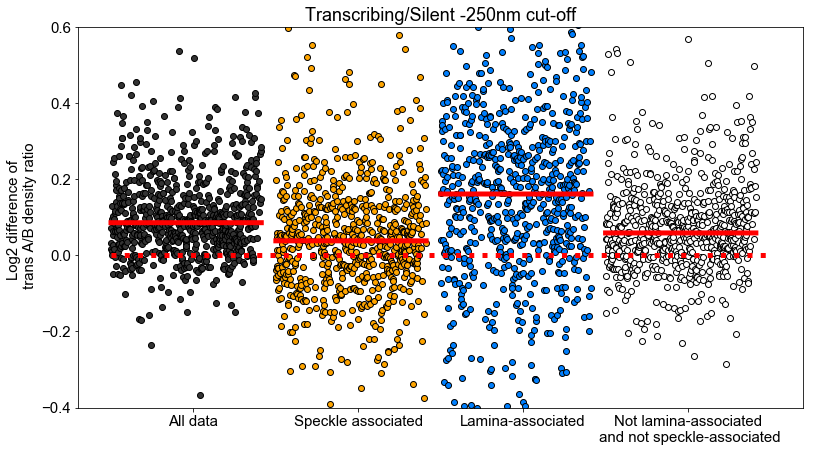

In [70]:
nuc_cutoof = 0.25
Asocs_LAM_WT = tot_distsLAM_WT_<nuc_cutoof
Asocs_NUC_WT = tot_distsNUC_WT_<nuc_cutoof
Asocs_SC_WT = tot_distsSC_WT_<nuc_cutoof
dif = (1041+100)

fig=plt.figure(figsize=(13,7))#4,7
dif = (1041+100)
cols = [[0.2,0.2,0.2],'orange',[0,0.5,1],'white']
good_WT = good_WT>0
Asocslist = [good_WT,Asocs_SC_WT,Asocs_LAM_WT,(~Asocs_SC_WT)&(~Asocs_LAM_WT)&good_WT]

lims = [-0.4,0.6]
no_pts = []
for iAsocs,Asocs in enumerate(Asocslist):
    Transcr =Transcr_WT==1
    DratioT = Dratio_WT.copy()
    DratioT[~(Transcr&Asocs&good_WT)]=np.nan
    dT = np.nanmedian(DratioT,0)
    DratioS = Dratio_WT.copy()
    DratioS[~((~Transcr)&Asocs&good_WT)]=np.nan
    dS = np.nanmedian(DratioS,0)
    logTS = np.log(dT/dS)/np.log(2)
    plt.plot(np.arange(1041)+dif*iAsocs,logTS,'o',color=cols[iAsocs],markeredgecolor='k')
    plt.plot(np.arange(1041)+dif*iAsocs,[np.nanmedian(logTS)]*1041,lw=5,color='r')#cols[iAsocs])
    fr = 1.*np.sum((dT/dS)>1)/np.sum((dT/dS)>0)
    no_pts.append([np.sum(logTS<lims[0]),np.sum(logTS>lims[1])])
    print(np.sum(logTS<lims[0]),np.sum(logTS>lims[1]))
    print("Number above 0:"+str(fr))
    from scipy.stats import wilcoxon as wilcoxon
    print wilcoxon(np.log(dT),np.log(dS))
#plt.title('B regions')
#plt.semilogy(np.arange(len(frLAM_am))+dif*0,1./frLAM_am*frLAM_WT,'o',color='gray',markeredgecolor='k')
#plt.semilogy(np.arange(len(frLAM_am))+dif*0,[np.nanmean(1./frLAM_am*frLAM_WT)]*1041,lw=5,color='gray')
#plt.semilogy(np.arange(len(frNUC_am))+dif*1,1./frNUC_am*frNUC_WT,'o',color='cyan',markeredgecolor='k')
#plt.semilogy(np.arange(len(frNUC_am))+dif*1,[np.nanmean(1./frNUC_am*frNUC_WT)]*1041,lw=5,color='cyan')
plt.plot([0,dif*len(Asocslist)],[0,0],':r',lw=5)
plt.ylabel('Log2 difference of \n trans A/B density ratio')
ax1 = fig.get_axes()[0]
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.yticks([0.5,1,2])

plt.ylim(lims)
plt.xticks([dif*iAsocs+dif/2 for iAsocs in range(len(Asocslist))],
           ['All data','Speckle associated','Lamina-associated','Not lamina-associated\n and not speckle-associated'],rotation=0)
plt.title('Transcribing/Silent -'+str(int(nuc_cutoof*1000))+'nm cut-off')#\nNo of cut points [above,below]:'+str(no_pts))
#fig.savefig(r'C:\Users\bogdan\Dropbox\ScienceWGCT_Figures\baseimages\Fig4_AB_enrichment_transcr_SCvsallrest_v3.pdf')
#folder = r'C:\Users\Bogdan\Dropbox\2020 Chromatin Imaging Manuscript\Revision\FinalFigures\Figure 7\Subpanels'
#import os
#fig.savefig(folder+os.sep+r'Fig7DTranscriptionAsociation_LongStrip-'+str(int(nuc_cutoof*1000))+'-.pdf')

fig.savefig(save_folder+os.sep+'fold_AB-density_transcribing_strip'+str(int(nuc_cutoof*1000))+'.pdf')

In [206]:
nuc_cutoff = 0.25
good_WT = tot_distsLAM_WT_>-1
frLAM_WT = 1.*np.sum(tot_distsLAM_WT_<nuc_cutoff,0)/np.sum(good_WT,0)
frNUC_WT = 1.*np.sum(tot_distsNUC_WT_<nuc_cutoff,0)/np.sum(good_WT,0)
frSC_WT = 1.*np.sum(tot_distsSC_WT_<nuc_cutoff,0)/np.sum(good_WT,0)

dLAM_WT = np.nanmedian(tot_distsLAM_WT_,axis=0)
dSC_WT = np.nanmedian(tot_distsSC_WT_,axis=0)
dNUC_WT = np.nanmedian(tot_distsNUC_WT_,axis=0)
dRAT_WT = np.nanmedian(Dratio_WT,axis=0)


AB = 'B,B,A,A,B,B,A,A,A,B,A,A,A,B,A,B,B,A,B,B,B,B,B,B,B,A,B,B,A,A,A,B,B,B,B,B,B,B,B,A,nan,A,A,A,B,A,B,A,B,A,B,A,B,A,A,A,B,B,B,A,A,A,B,B,A,B,B,A,B,B,B,B,B,B,B,A,B,B,A,A,B,B,B,A,A,B,A,B,A,A,B,B,B,A,B,B,A,B,A,B,A,B,B,B,B,B,nan,A,B,A,B,B,A,B,B,A,B,B,B,B,A,B,B,A,B,A,B,B,A,B,B,A,A,A,B,B,A,B,A,A,B,B,A,B,B,B,B,A,A,B,A,B,A,B,B,A,B,B,B,B,A,B,B,A,B,A,A,B,B,A,A,A,B,B,A,B,B,A,A,B,B,B,B,B,A,B,nan,B,A,A,B,A,B,A,B,A,A,A,A,B,B,A,B,B,B,A,B,B,B,B,B,A,A,B,A,B,A,A,B,B,A,A,A,B,B,B,A,B,B,A,A,B,B,B,A,A,B,B,nan,A,A,B,B,B,B,B,B,B,B,B,A,B,B,B,A,B,B,B,B,A,B,A,A,A,B,B,B,A,A,B,B,A,B,B,A,B,B,B,B,B,A,B,A,B,A,B,B,A,B,B,B,B,B,B,B,A,B,A,B,B,nan,B,A,A,B,B,A,B,A,B,A,A,A,B,B,A,A,B,B,B,B,B,B,B,B,A,B,B,B,A,A,B,A,B,A,B,B,B,B,B,B,B,B,A,A,A,B,B,A,A,A,A,B,B,A,A,A,B,A,B,B,B,A,A,B,B,B,B,A,B,B,B,B,A,B,B,B,B,B,A,A,B,B,B,B,B,A,A,A,B,A,A,A,A,B,B,B,B,B,B,B,A,B,B,B,B,B,B,B,A,A,A,B,A,A,A,B,B,B,nan,B,A,B,B,A,A,A,A,B,B,A,B,A,A,A,A,B,B,A,B,B,B,A,B,A,A,B,B,B,B,B,B,B,B,B,A,B,B,A,B,B,B,A,B,B,A,A,nan,A,B,A,B,B,B,B,A,A,B,B,A,B,B,B,B,B,A,B,A,B,B,B,B,A,A,B,B,B,B,B,A,nan,B,B,B,B,B,B,B,B,A,B,B,A,B,nan,nan,B,B,B,B,B,B,B,B,B,B,A,A,B,A,B,A,A,B,B,A,A,A,A,B,B,B,A,B,A,A,A,B,B,B,A,A,B,nan,A,nan,A,B,B,B,B,B,A,A,A,A,B,B,A,B,A,B,B,A,B,B,B,B,B,B,B,B,B,B,A,B,A,A,B,B,B,A,B,B,A,A,B,B,B,A,nan,B,B,B,A,A,A,A,A,B,B,B,B,A,A,B,B,A,B,A,B,A,B,A,B,B,B,B,A,A,B,B,B,B,B,B,A,B,B,nan,B,B,B,A,A,A,A,B,B,A,B,B,B,A,B,B,B,A,A,B,B,B,A,B,B,B,B,B,A,B,B,A,nan,A,A,B,B,B,B,B,A,A,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,nan,nan,B,B,B,B,B,B,B,B,B,B,A,A,B,B,B,B,A,B,A,B,B,B,B,B,B,B,B,A,A,nan,nan,B,B,B,B,A,B,A,A,B,A,B,B,B,B,B,A,A,A,B,A,A,B,B,B,A,B,B,B,B,A,B,B,B,B,A,B,B,B,B,A,B,B,nan,B,B,B,A,B,B,B,A,A,B,B,B,B,B,A,A,A,A,A,B,B,B,A,A,B,nan,B,A,B,B,A,A,A,A,A,A,B,B,B,A,A,A,A,B,B,A,A,A,A,B,B,B,A,A,B,nan,nan,A,A,B,B,B,B,A,B,A,B,A,B,B,B,A,A,B,B,B,A,A,B,A,A,A,A,A,A,B,B,A,B,A,B,A,A,B,B,nan,nan,B,B,B,B,B,B,A,A,A,A,A,A,A,B,B,B,B,B,B,A,B,B,B,B,B,B,B,B,B,B,B,nan,nan,nan,A,A,A,B,B,B,B,B,B,A,B,B,B,B,B,B,A,nan,B,B,nan,nan,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,A,B,B,B,B,B,B,A,A,nan,nan,nan,nan,B,A,A,A,A,A,B,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,nan,A,A,A,A,A,A,A,A,A,A,A,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B'
AB=np.array(AB.split(','))
lens = [76, 80, 66, 63, 60, 55, 53, 48, 40, 43, 44, 44, 33, 30, 31, 30, 33, 33, 33, 33, 31, 31, 51]
edges = np.cumsum([0]+lens)
A,B = AB=='A',AB=='B'

C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


In [246]:
save_folder = r'C:\Users\Bogdan\Dropbox\Figures_replace_genome_wide'

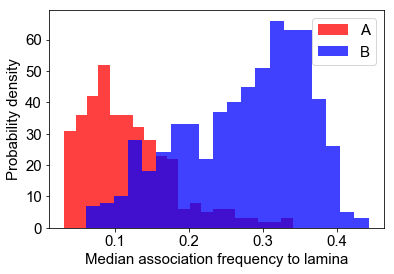

In [247]:
fr_LAM__ = frLAM_WT#1.*np.sum(Asocs_LAM_WT,0)/np.sum(good_WT,0)
fig = plt.figure()
hTEMP=plt.hist(fr_LAM__[A],color='r',bins=20,alpha=0.75,label='A')
plt.hist(fr_LAM__[B],color='b',bins=20,alpha=0.75,label='B')
plt.ylabel(r"Probability density")
plt.xlabel("Median association frequency to lamina")
plt.legend()
#yvals = np.linspace(0.,0.2,5)
#plt.yticks(np.array(yvals)*np.sum(hTEMP[0]),np.array(yvals)*100)
fig.savefig(save_folder+os.sep+r'lamina_association_rate__new.pdf')

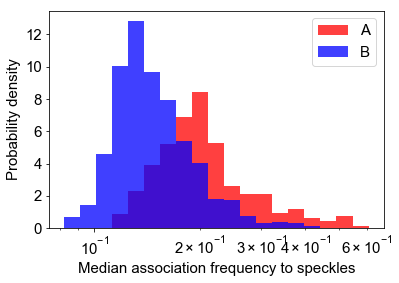

In [248]:
fr_SC__ = frSC_WT#1.*np.sum(Asocs_SC_WT,0)/np.sum(good_WT,0)
fig = plt.figure()
hTEMP=plt.hist(fr_SC__[A],color='r',bins=np.exp(np.linspace(-2.5,-0.5,20)),alpha=0.75,label='A',normed=True)
HTEMP = plt.hist(fr_SC__[B],color='b',bins=np.exp(np.linspace(-2.5,-0.5,20)),alpha=0.75,label='B',normed=True)
plt.ylabel("Probability density")
plt.xlabel("Median association frequency to speckles")
plt.gca().set_xscale("log")
plt.legend()
yvals = np.linspace(0,0.30,4)
#plt.yticks(np.array(yvals)*np.sum(hTEMP[0]),np.array(yvals)*100);
fig.savefig(save_folder+os.sep+'speckle_association_rate__new.pdf')

In [138]:
from tqdm import tqdm_notebook as tqdm
dic_tr_A = {}
dic_tr_B = {}
lines_ = lines[1:,7:9].reshape([-1,1041,2])
lines_A = lines_[:,A].reshape([-1,2])
lines_B = lines_[:,B].reshape([-1,2])
for nms,trs in tqdm(lines_A):
    if trs!= 'nan' and nms!='':
        for gn,tr in zip(nms.split(','),trs.split(',')):
            dic_tr_A[gn] = dic_tr_A.get(gn,[])+[tr]
for nms,trs in tqdm(lines_B):
    if trs!= 'nan' and nms!='':
        for gn,tr in zip(nms.split(','),trs.split(',')):
            dic_tr_B[gn] = dic_tr_B.get(gn,[])+[tr]

In [202]:
len(dic_tr_A.keys()),len(dic_tr_B.keys()),np.sum(A)+np.sum(B)

(558, 569, 1005)

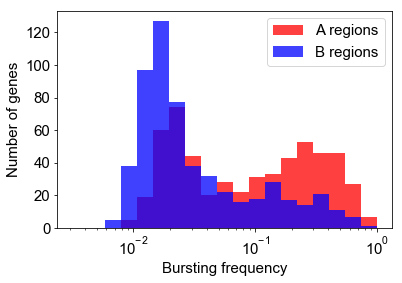

In [249]:
frsB = np.array([np.mean(np.array(dic_tr_B[key])=='on') for key in dic_tr_B])#/np.log(10)
frsA = np.array([np.mean(np.array(dic_tr_A[key])=='on') for key in dic_tr_A])#/np.log(10)
fig=plt.figure()

plt.hist(frsA,bins=10**(np.linspace(-2.5,0,20)),color='r',alpha=0.75,label='A regions')
plt.hist(frsB,bins=10**(np.linspace(-2.5,0,20)),color='b',alpha=0.75,label='B regions')
plt.gca().set_xscale("log")
plt.legend()
plt.xlabel('Bursting frequency')
plt.ylabel('Number of genes')
plt.show()
fig.savefig(save_folder+os.sep+'firing_rate__new.pdf')